# Data Analysis for SQL execution time prediction

## Distribution analysis of Execution time

The distribution of the data (upto 70th percentile) seems to have a right tailed distribution, which is expected for an OLTP system. OLTP's generally perform a lot of very tiny units of work as opposed to an OLAP (or an analytical system). The system we have is really a mix between OLTP and OLAP, which is probably why the top quantile of data is so far off to the right, but this needs to be verified. 

Mean of execution time:  0.05468586194167159
standard Deviation of execution time:  0.054248945119296815


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f158d29d518>]], dtype=object)

/home/rdurbha/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


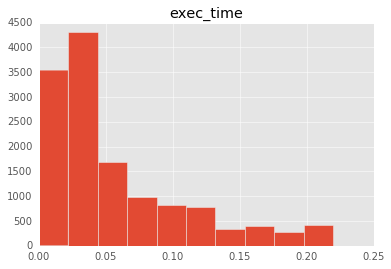

In [50]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')
data = pd.read_csv ('/data/developer/python/exec_time.csv',names = ['Workload_type','exec_time'])
data.exec_time = data.exec_time.round(2)
#data.exec_time
per70data=data[data.exec_time < data.exec_time.quantile(q=0.70)]
print ("Mean of execution time: ", per70data.exec_time.mean())
print ("standard Deviation of execution time: ", per70data.exec_time.std())
per70data.hist(bins=10)

Disribution between 70th and 95th percentile. Again, it is right tailed but the time is much larger(These are at 1 to 10ms)

Mean of execution time:  1.970071398572025
standard Deviation of execution time:  2.3752086135609516


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f158d4e4630>]], dtype=object)

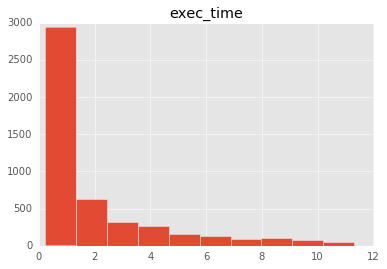

In [51]:
topquantiledata=data[(data.exec_time > data.exec_time.quantile(q=0.70))&(data.exec_time < data.exec_time.quantile(q=0.95))]
print ("Mean of execution time: ", topquantiledata.exec_time.mean())
print ("standard Deviation of execution time: ", topquantiledata.exec_time.std())
topquantiledata.hist(bins=10)


## Classifying execution time by workload type

Workload_type
INSERT    Axes(0.125,0.125;0.775x0.775)
SELECT    Axes(0.125,0.125;0.775x0.775)
Name: exec_time, dtype: object

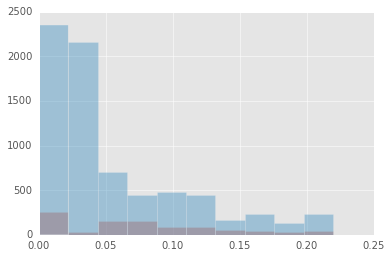

In [90]:
#per70data['Workload_type'] = per70data['Workload_type'].str.upper()
sdata = per70data[(per70data.Workload_type == 'SELECT')|(per70data.Workload_type == 'INSERT')].groupby('Workload_type')
sdata.exec_time.hist(alpha = 0.4)

Workload_type
DELETE    Axes(0.125,0.125;0.775x0.775)
SELECT    Axes(0.125,0.125;0.775x0.775)
Name: exec_time, dtype: object

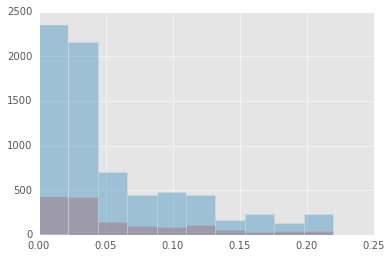

In [92]:
sdata = per70data[(per70data.Workload_type == 'SELECT')|(per70data.Workload_type == 'DELETE')].groupby('Workload_type')
sdata.exec_time.hist(alpha = 0.4)

Workload_type
INSERT    Axes(0.125,0.125;0.775x0.775)
MERGE     Axes(0.125,0.125;0.775x0.775)
Name: exec_time, dtype: object

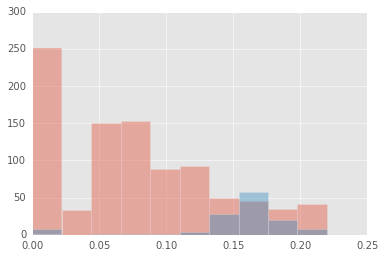

In [94]:
sdata = per70data[(per70data.Workload_type == 'INSERT')|(per70data.Workload_type == 'MERGE')].groupby('Workload_type')
sdata.exec_time.hist(alpha = 0.4)

Workload_type
DELETE    Axes(0.125,0.125;0.775x0.775)
INSERT    Axes(0.125,0.125;0.775x0.775)
Name: exec_time, dtype: object

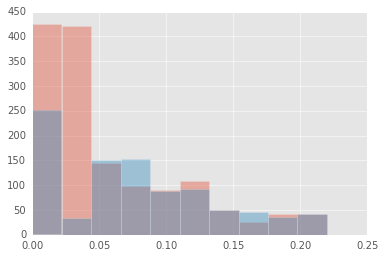

In [107]:
sdata = per70data[(per70data.Workload_type == 'INSERT')|(per70data.Workload_type == 'DELETE')].groupby('Workload_type')
sdata.exec_time.hist(alpha = 0.4)